In [189]:
# Import Libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import ipywidgets as widgets


In [190]:
# Load The dataset
employee_df = pd.read_csv('/content/layoffs.csv')


In [191]:
employee_df

,location,industry,total_laid_off,percentage_laid_off,date,country
0,Hamburg,Consumer,400.0,NaN,1/11/2024,Germany
1,Tel Aviv,Consumer,300.0,0.10,1/11/2024,Israel
2,SF Bay Area,Consumer,170.0,0.17,1/11/2024,United States
3,Bengaluru,Marketing,125.0,0.05,1/11/2024,India
4,New York City,Media,100.0,0.05,1/11/2024,United States
...,...,...,...,...,...,...
3308,Los Angeles,Travel,NaN,1.00,3/16/2020,United States
3309,Los Angeles,Transportation,8.0,0.10,3/13/2020,United States
3310,SF Bay Area,Consumer,6.0,0.75,3/13/2020,United States
3311,Los Angeles,Retail,20.0,0.40,3/12/2020,United States


In [192]:
employee_df.head(5)

,location,industry,total_laid_off,percentage_laid_off,date,country
0,Hamburg,Consumer,400.0,NaN,1/11/2024,Germany
1,Tel Aviv,Consumer,300.0,0.10,1/11/2024,Israel
2,SF Bay Area,Consumer,170.0,0.17,1/11/2024,United States
3,Bengaluru,Marketing,125.0,0.05,1/11/2024,India
4,New York City,Media,100.0,0.05,1/11/2024,United States


In [193]:
employee_df.tail(10)

,location,industry,total_laid_off,percentage_laid_off,date,country
3303,New York City,Fitness,NaN,1.00,3/19/2020,United States
3304,Phoenix,Retail,NaN,NaN,3/19/2020,United States
3305,Boulder,Marketing,4.0,0.20,3/18/2020,United States
3306,Denver,Travel,130.0,0.22,3/16/2020,United States
3307,Austin,Support,16.0,1.00,3/16/2020,United States
3308,Los Angeles,Travel,NaN,1.00,3/16/2020,United States
3309,Los Angeles,Transportation,8.0,0.10,3/13/2020,United States
3310,SF Bay Area,Consumer,6.0,0.75,3/13/2020,United States
3311,Los Angeles,Retail,20.0,0.40,3/12/2020,United States
3312,Salt Lake City,Logistics,75.0,NaN,3/11/2020,United States


In [194]:
employee_df.info()
# 35 features in total, each contains 1470 data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             3312 non-null   object 
 1   industry             3312 non-null   object 
 2   total_laid_off       2189 non-null   float64
 3   percentage_laid_off  2141 non-null   float64
 4   date                 3313 non-null   object 
 5   country              3313 non-null   object 
dtypes: float64(2), object(4)
memory usage: 155.4+ KB


In [195]:
employee_df.describe()

,total_laid_off,percentage_laid_off
count,2189.000000,2141.000000
mean,242.146185,0.277458
std,767.384119,0.281162
min,3.000000,0.000000
25%,40.000000,0.100000
50%,80.000000,0.170000
75%,180.000000,0.300000
max,12000.000000,1.000000


# Data Visualization

In [196]:
# Check if the columns exist before applying transformations
if 'percentage_laid_off' in employee_df.columns:
    employee_df['total_laid_off'] = employee_df['percentage_laid_off'].apply(lambda x: 1 if x == 'Yes' else 0)
else:
    print("Column 'percentage_laid_off' not found in DataFrame.")



In [197]:
employee_df.head(4)

,location,industry,total_laid_off,percentage_laid_off,date,country
0,Hamburg,Consumer,0,NaN,1/11/2024,Germany
1,Tel Aviv,Consumer,0,0.10,1/11/2024,Israel
2,SF Bay Area,Consumer,0,0.17,1/11/2024,United States
3,Bengaluru,Marketing,0,0.05,1/11/2024,India


<Axes: >

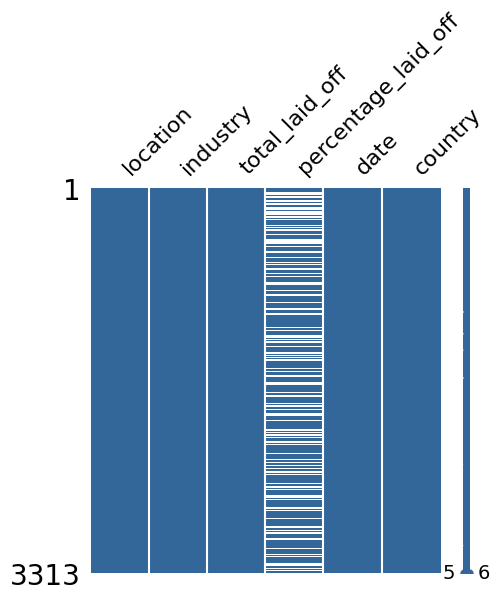

In [198]:
# See if we have any missing data,
msno.matrix(employee_df, figsize=(5, 5), color=(0.2, 0.4, 0.6))


array([[<Axes: title={'center': 'total_laid_off'}>,
        <Axes: title={'center': 'percentage_laid_off'}>]], dtype=object)

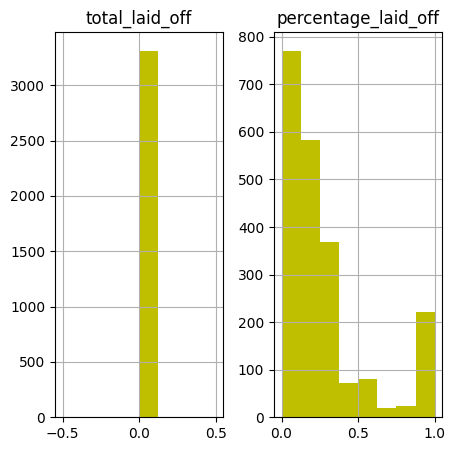

In [199]:
employee_df.hist(bins = 8, figsize = (5,5), color = 'y')

In [200]:
# Let's see how many employees left the company!
left_df        = employee_df[employee_df['total_laid_off'] == 1]
stayed_df      = employee_df[employee_df['percentage_laid_off'] == 0]


In [201]:
left_df.describe()

,total_laid_off,percentage_laid_off
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [202]:
stayed_df.describe()

,total_laid_off,percentage_laid_off
count,1.0,1.0
mean,0.0,0.0
std,NaN,NaN
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


<Axes: xlabel='total_laid_off', ylabel='count'>

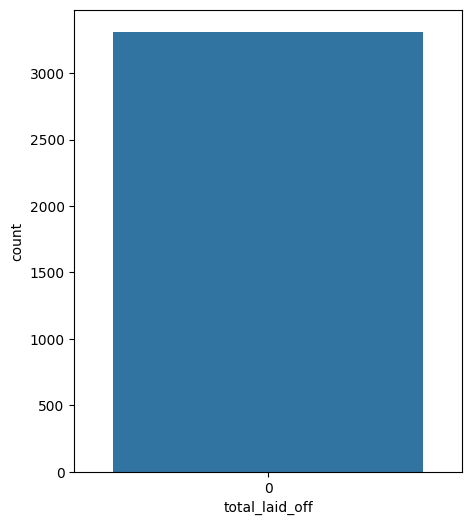

In [203]:
plt.figure(figsize=[5, 6])
sns.countplot(x='total_laid_off', data=employee_df)

In [204]:
employee_df.head(100)

,location,industry,total_laid_off,percentage_laid_off,date,country
0,Hamburg,Consumer,0,NaN,1/11/2024,Germany
1,Tel Aviv,Consumer,0,0.10,1/11/2024,Israel
2,SF Bay Area,Consumer,0,0.17,1/11/2024,United States
3,Bengaluru,Marketing,0,0.05,1/11/2024,India
4,New York City,Media,0,0.05,1/11/2024,United States
...,...,...,...,...,...,...
95,Washington D.C.,Media,0,0.04,11/30/2023,United States
96,SF Bay Area,Other,0,0.04,11/28/2023,United States
97,New York City,AI,0,0.20,11/28/2023,United States
98,London,Education,0,0.05,11/28/2023,United Kingdom


In [205]:
# Assuming you have a DataFrame named 'data' with features and target variable
X = employee_df.drop(columns=['percentage_laid_off'])  # Drop the target column from features
y = employee_df['percentage_laid_off']  # Select the target column

# Now you can use train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [206]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='distilbert-base-uncased')
unmasker("Hello I'm a [MASK] model.")

[{'score': 0.05292844399809837,
  'token': 2535,
  'token_str': 'role',
  'sequence': "hello i'm a role model."},
 {'score': 0.03968599811196327,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello i'm a fashion model."},
 {'score': 0.034743644297122955,
  'token': 2449,
  'token_str': 'business',
  'sequence': "hello i'm a business model."},
 {'score': 0.03462294861674309,
  'token': 2944,
  'token_str': 'model',
  'sequence': "hello i'm a model model."},
 {'score': 0.01814521849155426,
  'token': 11643,
  'token_str': 'modeling',
  'sequence': "hello i'm a modeling model."}]

In [207]:
Classifier = pipeline(task= "sentiment-analysis", model = "distilbert-base-uncased-finetuned-sst-2-english")
Classifier('HR Dashboard')

[{'label': 'POSITIVE', 'score': 0.5066040754318237}]

In [208]:
!pip install gradio

In [209]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

# Load the pre-trained tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Load the pre-trained model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In [210]:
employee_df.shape

(3313, 6)

In [211]:
# Check for NaN values in the 'country' column
nan_values = employee_df[employee_df['country'].isna()]

# Check the data type of values in the 'country' column
data_type = employee_df['country'].dtype

print("NaN Values:")
print(nan_values)
print("\nData Type:")
print(data_type)

NaN Values:
Empty DataFrame
Columns: [location, industry, total_laid_off, percentage_laid_off, date, country]
Index: []

Data Type:
object


In [212]:
employee_df

,location,industry,total_laid_off,percentage_laid_off,date,country
0,Hamburg,Consumer,0,NaN,1/11/2024,Germany
1,Tel Aviv,Consumer,0,0.10,1/11/2024,Israel
2,SF Bay Area,Consumer,0,0.17,1/11/2024,United States
3,Bengaluru,Marketing,0,0.05,1/11/2024,India
4,New York City,Media,0,0.05,1/11/2024,United States
...,...,...,...,...,...,...
3308,Los Angeles,Travel,0,1.00,3/16/2020,United States
3309,Los Angeles,Transportation,0,0.10,3/13/2020,United States
3310,SF Bay Area,Consumer,0,0.75,3/13/2020,United States
3311,Los Angeles,Retail,0,0.40,3/12/2020,United States


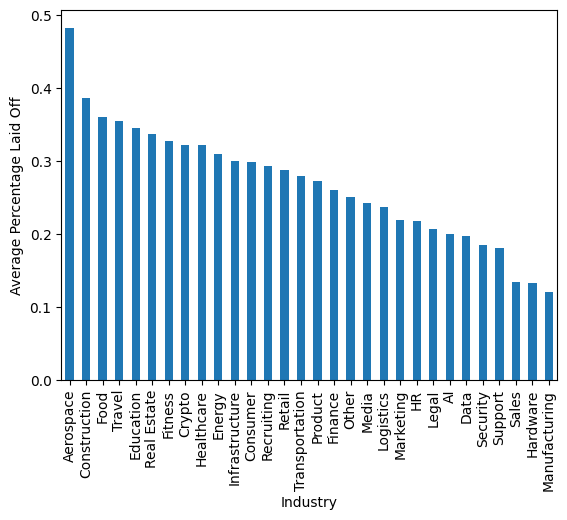

In [213]:
# @title Highest Percentage Laid Off by Industry

import matplotlib.pyplot as plt
employee_df.groupby('industry')['percentage_laid_off'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Industry')
_ = plt.ylabel('Average Percentage Laid Off')

<Axes: xlabel='industry'>

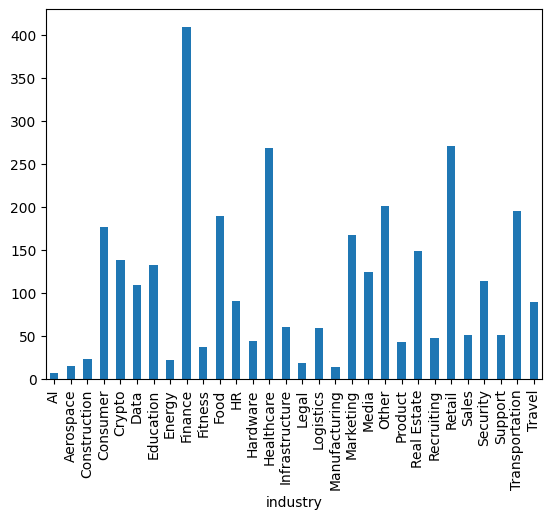

In [214]:
# @title Total companies laying off employees per industry

employee_df.groupby('industry')['location'].count().plot(kind='bar')

In [215]:
y_train

2146     NaN
1592    1.00
1538    0.60
2527    0.07
771     0.03
        ... 
2844     NaN
280     0.09
2027    0.05
1597     NaN
2896    0.15
Name: percentage_laid_off, Length: 2484, dtype: float64

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy: 1.0
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Cannot calculate ROC AUC: index 1 is out of bounds for axis 1 with size 1


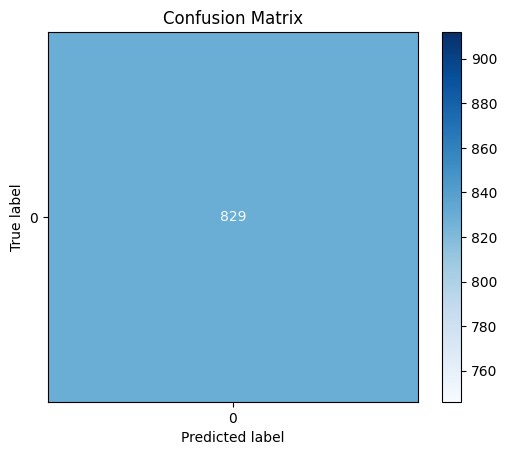

In [216]:
# Convert 'percentage_laid_off' to binary labels
employee_df['total_laid_off'] = employee_df['percentage_laid_off'].apply(lambda x: 1 if x == 'Yes' else 0)

# Drop unnecessary columns
X = employee_df.drop(columns=['percentage_laid_off'])
y = employee_df['total_laid_off']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define categorical and numerical columns
categorical_cols = ['location', 'industry', 'date', 'country']  # Assuming these are categorical columns
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Create KNN model with CalibratedClassifierCV
knn_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CalibratedClassifierCV(KNeighborsClassifier()))
])

# Train the model
knn_model.fit(X_train, y_train)

# Evaluate the model
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)

print("Precision:", precision)
print("Recall:", recall)

# Calculate ROC AUC if possible
try:
    y_pred_prob = knn_model.predict_proba(X_test)[:, 1]  # Getting probabilities using predict_proba
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print("ROC AUC Score:", roc_auc)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
except Exception as e:
    print("Cannot calculate ROC AUC:", e)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [217]:
# install dependencies
!pip install diffusers
!pip install transformers

In [218]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='distilbert-base-uncased')
unmasker("Hello I'm a [MASK] model.")

[{'score': 0.05292844399809837,
  'token': 2535,
  'token_str': 'role',
  'sequence': "hello i'm a role model."},
 {'score': 0.03968599811196327,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello i'm a fashion model."},
 {'score': 0.034743644297122955,
  'token': 2449,
  'token_str': 'business',
  'sequence': "hello i'm a business model."},
 {'score': 0.03462294861674309,
  'token': 2944,
  'token_str': 'model',
  'sequence': "hello i'm a model model."},
 {'score': 0.01814521849155426,
  'token': 11643,
  'token_str': 'modeling',
  'sequence': "hello i'm a modeling model."}]

In [219]:
from transformers import DistilBertTokenizer, TFDistilBertModel
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")
text = "HR Dashboard."
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [220]:
Classifier = pipeline(task= "sentiment-analysis", model = "distilbert-base-uncased-finetuned-sst-2-english")
Classifier('HR Dashboard')

[{'label': 'POSITIVE', 'score': 0.5066040754318237}]

In [221]:
!pip install gradio

In [222]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

# Load the pre-trained tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Load the pre-trained model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In [223]:
# Function to update bar chart based on location selection
def update_bar_chart(location):
    plt.figure(figsize=(10, 6))
    df_location = employee_df[employee_df['location'] == location]
    plt.bar(df_location['industry'], df_location['total_laid_off'])
    plt.title(f'Total Employees Laid Off in {location}')
    plt.xlabel('Industry')
    plt.ylabel('Total Laid Off')
    plt.xticks(rotation=45)
    plt.show()

In [224]:
unique_countries = employee_df['country'].unique()
print(unique_countries)

['Germany' 'Israel' 'United States' 'India' 'Japan' 'Canada'
 'United Kingdom' 'China' 'Poland' 'Nigeria' 'Sweden' 'Estonia' 'Romania'
 'Singapore' 'Finland' 'France' 'Netherlands' 'Switzerland' 'Indonesia'
 'Brazil' 'Ghana' 'Czech Republic' 'Hong Kong' 'Kenya' 'Norway' 'Spain'
 'Australia' 'Ireland' 'New Zealand' 'Luxembourg' 'Cayman Islands'
 'Mexico' 'South Korea' 'Chile' 'Saudi Arabia' 'Philippines' 'Austria'
 'Ukraine' 'Italy' 'Portugal' 'Colombia' 'Argentina' 'Seychelles' 'Egypt'
 'Greece' 'Belgium' 'Denmark' 'Malaysia' 'Hungary' 'Vietnam' 'Thailand'
 'Lithuania' 'Senegal' 'Pakistan' 'United Arab Emirates' 'Peru' 'Bahrain'
 'Turkey' 'Russia' 'Uruguay' 'Bulgaria' 'South Africa' 'Myanmar']


In [225]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

In [226]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")

In [227]:
! pip install gradio

In [228]:
import gradio as gr

def get_sentiment_response(query):
    # Implement your sentiment analysis and response generation logic here
    response = "The sentiments of the people laid off may vary. Some may feel depressed and resentful towards their company for their decision to lay them off. Others may feel survivor's guilt and feel grateful for still having a job. Some may also feel motivated to find a new job, while others may feel disheartened by the job market. Overall, the sentiments of individuals who have been laid off may be a mix of emotions such as anger, sadness, uncertainty, and hope."
    return response

iface = gr.Interface(fn=get_sentiment_response,
                     inputs=gr.Textbox(label="Enter your query:"),
                     outputs=gr.Textbox(label="Result:"),
                     title="Let's Talk with Data!")

iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e91c69926c2fa5ef46.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
